In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Advertising.csv")

df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


<Axes: xlabel='total_spend', ylabel='sales'>

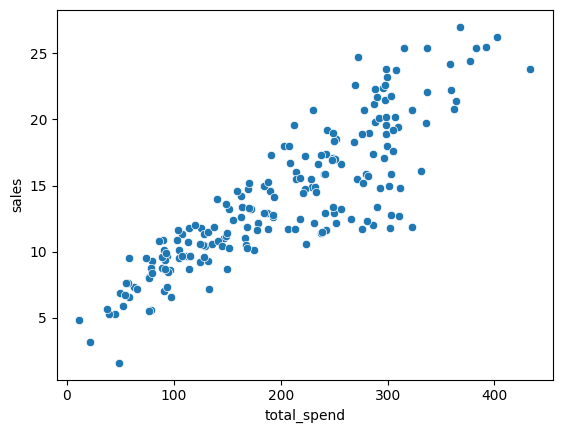

In [5]:
sns.scatterplot(x='total_spend',y='sales',data=df)

<Axes: xlabel='total_spend', ylabel='sales'>

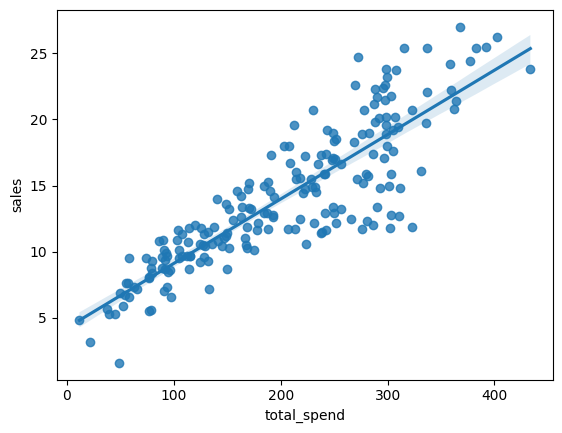

In [6]:
# Basically, we want to figure out how to create this line
sns.regplot(x='total_spend',y='sales',data=df)

In [7]:
X = df['total_spend']
y = df['sales']

In [9]:
X

0      337.1
1      128.9
2      132.4
3      251.3
4      250.0
       ...  
195     55.7
196    107.2
197    192.7
198    391.8
199    249.4
Name: total_spend, Length: 200, dtype: float64

In [10]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [11]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_

In [13]:
# Returns highest order coef first!
# y = 0.04868788 * x + 4.24302822
np.polyfit(X,y,1)

array([0.04868788, 4.24302822])

In [15]:
# Potential Future Spend Budgets
potential_spend = np.linspace(0,500,100)

potential_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [17]:
predicted_sales =  0.04868788*potential_spend + 4.24302822

predicted_sales

array([ 4.24302822,  4.4889266 ,  4.73482499,  4.98072337,  5.22662176,
        5.47252014,  5.71841852,  5.96431691,  6.21021529,  6.45611367,
        6.70201206,  6.94791044,  7.19380883,  7.43970721,  7.68560559,
        7.93150398,  8.17740236,  8.42330075,  8.66919913,  8.91509751,
        9.1609959 ,  9.40689428,  9.65279266,  9.89869105, 10.14458943,
       10.39048782, 10.6363862 , 10.88228458, 11.12818297, 11.37408135,
       11.61997974, 11.86587812, 12.1117765 , 12.35767489, 12.60357327,
       12.84947165, 13.09537004, 13.34126842, 13.58716681, 13.83306519,
       14.07896357, 14.32486196, 14.57076034, 14.81665873, 15.06255711,
       15.30845549, 15.55435388, 15.80025226, 16.04615064, 16.29204903,
       16.53794741, 16.7838458 , 17.02974418, 17.27564256, 17.52154095,
       17.76743933, 18.01333771, 18.2592361 , 18.50513448, 18.75103287,
       18.99693125, 19.24282963, 19.48872802, 19.7346264 , 19.98052479,
       20.22642317, 20.47232155, 20.71821994, 20.96411832, 21.21

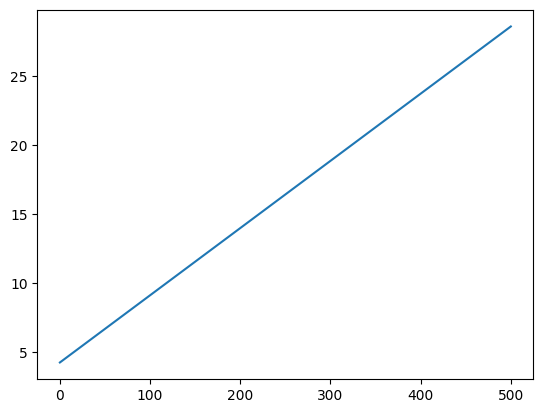

In [18]:
plt.plot(potential_spend,predicted_sales)

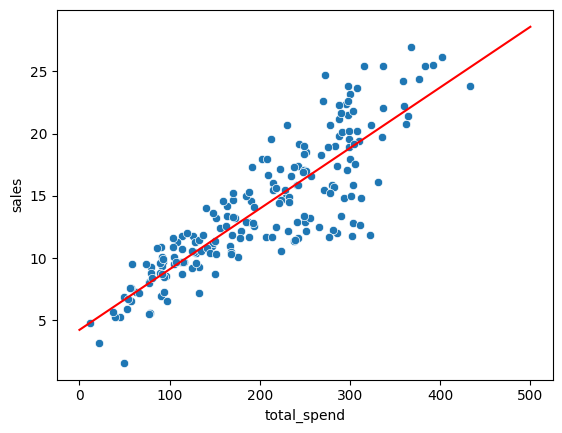

In [19]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

In [21]:
## Our next ad campaign will have a total spend of $200, how many units do we expect to sell as a result of this?

spend = 200
predicted_sales =  0.04868788*spend + 4.24302822

predicted_sales

13.98060422

In [33]:
X = df['total_spend']
y = df['sales']
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [34]:
# Potential Future Spend Budgets
potential_spend = np.linspace(0,500,100)

In [35]:
predicted_sales =   3.07615033e-07*potential_spend**3 + -1.89392449e-04*potential_spend**2 + 8.20886302e-02*potential_spend**1 + 2.70495053e+00

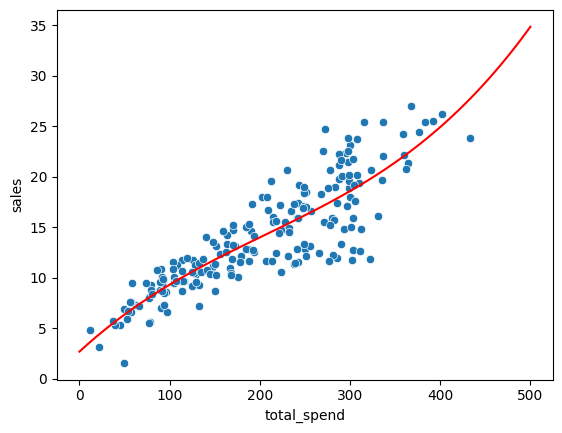

In [36]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')